In [48]:
from datasets import load_dataset
import pandas as pd
import os

from utils.filemanagement import load_from_file,save_preprocessed_df_to_file
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [49]:
SAMPLE_SIZE = 100
PIPELINE = "basic"
folder_path_data = r"preprocessed_data"
file_name_previous_data="np_mini_basic.csv"
file_name_data ="np_mini_stopwords.csv"

df_one = load_from_file(folder_path_data,file_name_previous_data)


In [50]:
stopwords = []
with open("stopwords.txt","r",encoding="utf-8") as file:
    for line in file:
        stopwords.append(line.strip())
print(stopwords)



['a', 'å', 'æ', 'akkurat', 'aldri', 'all', 'alle', 'aller', 'allerede', 'allereie', 'alltid', 'alt', 'altfor', 'altså', 'an', 'andre', 'anna', 'annan', 'annen', 'annet', 'annleis', 'antakeleg', 'april', 'år', 'åra', 'årene', 'året', 'at', 'att', 'attende', 'august', 'av', 'b', 'både', 'båe', 'bak', 'baki', 'bakover', 'bare', 'begge', 'begynne', 'begynt', 'begynte', 'berre', 'består', 'beste', 'besto', 'betre', 'betyr', 'blant', 'ble', 'blei', 'bli', 'blir', 'blitt', 'bør', 'bort', 'bortsett', 'bra', 'bruk', 'bruke', 'brukes', 'brukt', 'brukte', 'burde', 'byrja', 'byrje', 'c', 'd', 'da', 'då', 'dag', 'danner', 'de', 'deg', 'dei', 'deim', 'deira', 'deires', 'del', 'delar', 'delen', 'deler', 'dels', 'delt', 'delvis', 'dem', 'den', 'denne', 'dens', 'der', 'dere', 'deres', 'deretter', 'derfor', 'deriblant', 'derimot', 'dermed', 'dersom', 'desember', 'desse', 'dessutan', 'dessuten', 'det', 'dets', 'dette', 'di', 'difor', 'din', 'direkte', 'disse', 'dit', 'ditt', 'dog', 'dømes', 'dreiv', 'dre

In [51]:
data = df_one.text.values.tolist()

In [52]:
new_data = []
for item in data:
    word_tokens = word_tokenize(item)
    filtered_sentence = [w for w in word_tokens if not w in stopwords]
    new_data.append(" ".join(filtered_sentence))

In [53]:
print(new_data[0:1])


['representanten harald tom nesvik bad ordet naturlig kommentere sonja sjøli betraktningene representantene unyanserte framstiller regjeringen regjeringspartiene generelt motstandere private tjenester opposisjonen høyre fremskrittspartiet bilde stemmer dårlig virkeligheten innførte fastlegeordningen måter drevet arbeiderpartiet sv utgangspunktet kommuneleger fast ansatt kommuner privatpraktiserende selvstendig næringsdrivende arbeidsgiveransvar avtaler inngått privatpraktiserende spesialister høyre fremskrittspartiet utnytte kapasiteten hovedsak sv arbeiderpartiet fylkeskommunene helseforetakene privatpraktiserende spesialistene skummet fløten helsemarkedet forpliktelser forpliktelser refusjonstilskudd ventelistene ventelistene forpliktet måte verste eksemplene frihet ansvar fremskrittspartiet foreslått refusjonsordning privatpraktiserende spesialister knytter forpliktelser pasienter behandle framstillingen partiene blottet refleksjoner forhold bruken offentlige midler nødt gir midler 

In [54]:
df_one['text'] = new_data

In [55]:
save_preprocessed_df_to_file(folder_path_data,file_name_data,df_one)

In [56]:

df_one['text'] = new_data

In [57]:
import pandas as pd
import os

In [58]:
notebook_path = os.path.abspath("norwegianparliament.ipynb")
train_csv = os.path.join(os.path.dirname(notebook_path), file_name_data)

df = load_from_file(folder_path_data,file_name_data)

In [59]:
df.describe()

,label
count,3600.000000
mean,0.500000
std,0.500069
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [60]:
df.head()

,text,label,date
0,representanten harald tom nesvik bad ordet nat...,1,2009-06-03
1,selvfølgelig diskusjon timer saken konstatere ...,1,2011-02-16
2,takk svaret svar linjene senterpartiets progra...,0,2007-03-21
3,riktig alternative statsbudsjetter prinsipale ...,0,2004-10-26
4,dagens dagsavisen stortingsrepresentant astrid...,0,2000-11-15


In [61]:
#df.text.map(len).max()

In [62]:
#df.text.map(len).min()

In [63]:
import numpy as np
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,text,label,date
528,replisere jan tore sanner representanten grand...,1,2004-11-25


In [64]:
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

,text,label,date
2167,besvart,1,2008-12-08


In [65]:
df['date'].unique()

array(['2009-06-03', '2011-02-16', '2007-03-21', ..., '2015-05-07',
       '2007-04-17', '2009-03-23'], dtype=object)

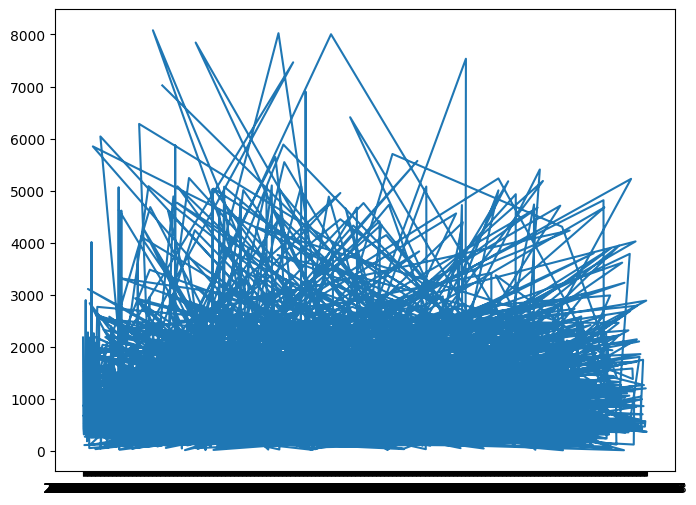

In [66]:
data = df["text"].str.len()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['date'],data)

df['date'] =pd.to_datetime(df['date'])

In [67]:
df.date

0      2009-06-03
1      2011-02-16
2      2007-03-21
3      2004-10-26
4      2000-11-15
          ...    
3595   2010-06-14
3596   2004-03-10
3597   2009-10-21
3598   2006-10-05
3599   2000-03-29
Name: date, Length: 3600, dtype: datetime64[ns]

In [68]:
partier = {0:'Fremskrittspartiet',1:'Sosialistisk Venstreparti'}
df['partier'] = df['label'].map(partier)

<AxesSubplot: xlabel='partier'>

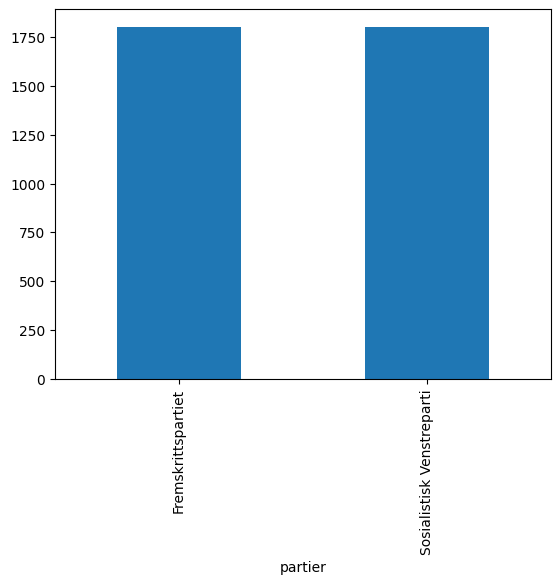

In [69]:
df.groupby('partier')['partier'].count().plot(kind='bar')

Text(0.5, 0, 'Year')

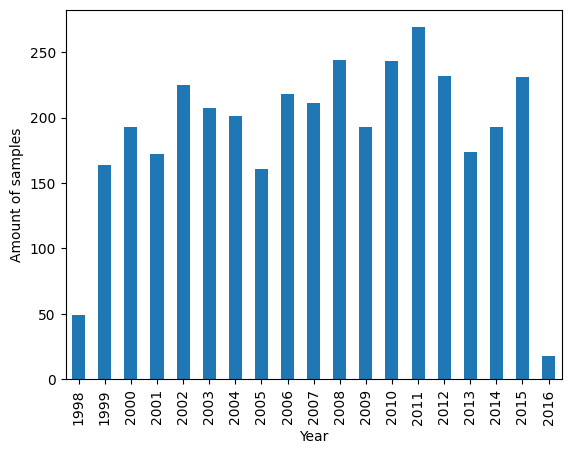

In [70]:
ar = df['text'].groupby(df['date'].dt.to_period('Y')).count().plot(kind='bar')
ar.set_ylabel("Amount of samples")
ar.set_xlabel("Year")

Text(0.5, 0, 'Year')

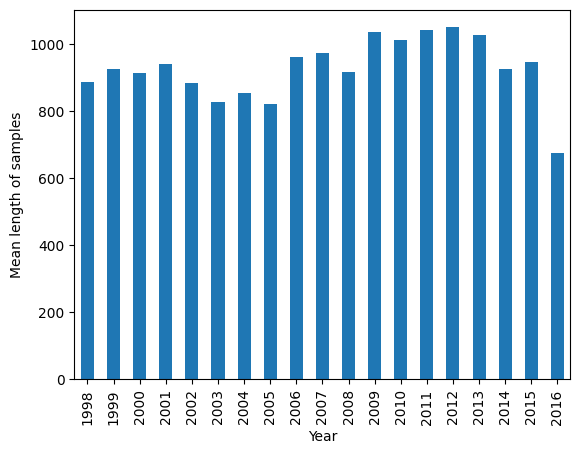

In [71]:
ax = df['text'].str.len().groupby(df['date'].dt.to_period('Y')).mean().plot(kind='bar')
ax.set_ylabel("Mean length of samples")
ax.set_xlabel("Year")

In [72]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [73]:
dd = FreqDist(df['text'])

In [74]:
print(dd)

<FreqDist with 3599 samples and 3600 outcomes>


In [75]:
df['text'] = df['text'].apply(lambda x: str(x))

In [76]:
from wordcloud import WordCloud

In [77]:
df['new'] = df['text'].apply(lambda x: word_tokenize(x))

In [78]:
df['label'].value_counts()

1    1800
0    1800
Name: label, dtype: int64

In [79]:
freq = pd.value_counts(np.hstack(df['new']))

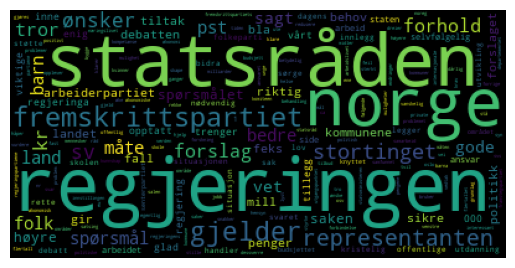

In [80]:
wordcloud = WordCloud().generate_from_frequencies(freq)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("npnb")
plt.show()


In [81]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"lenght of vocab {len(vocab)}")

lenght of vocab 46488


In [82]:
print(f"largest length of entry {df.text.map(len).max()}")

largest length of entry 8081


In [83]:
print(f"lowest length of entry {df.text.map(len).min()}")

lowest length of entry 3


In [84]:
r = list(df['text'])

In [85]:
res = 0
for item in r:
    res+= len(item)
print(f"Tokens in collection {res}")

Tokens in collection 3401802


In [86]:
from utils.dataset_stats import get_data_stats
from utils.filemanagement import write_dataset_stats

stats = get_data_stats(new_data)
print(stats)

write_dataset_stats(folder_path_data,file_name_data,stats)

[3600, 46487, 369478, 7.94798545830017, 102.63277777777778, 0.0, 906, 0]
